In [1]:
import pandas as pd
import numpy as np

This notebook demonstrates simple aggregation of datasets following covid and swine influenza spreads, as well as factors such as healthcare access and pollution, and see if there is a correlation between the spreads of these viruses and these living factors

In [2]:
covid_df = pd.read_csv('./data/covid_archive/country_wise_latest.csv');
h1n1_df = pd.read_csv('./h1n1_archive/data.csv');
city_country_relation = pd.read_csv('./quality_of_life_archive/cities.csv');
city_df = pd.read_csv('./quality_of_life_archive/movehubqualityoflife.csv');

In [3]:
print(covid_df.columns)
print(h1n1_df.columns)
print(city_country_relation.columns)
print(city_df.columns)

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')
Index(['Date', 'Country', 'Cumulative no. of cases',
       'Cumulative no. of deaths', 'Link'],
      dtype='object')
Index(['City', 'Country'], dtype='object')
Index(['City', 'Movehub Rating', 'Purchase Power', 'Health Care', 'Pollution',
       'Quality of Life', 'Crime Rating'],
      dtype='object')


In [4]:
city_2_country = city_country_relation.set_index('City').to_dict()
city_2_country = city_2_country['Country']
print(city_2_country)

{'Oakland': 'United States', 'Oakville': 'Canada', 'Oaxaca de Juárez': 'Mexico', 'Oberhausen': 'Germany', 'Obihiro': 'Japan', 'Obninsk': 'Russia', 'Oceanside': 'United States', 'Odawara': 'Japan', 'Odense': 'Denmark', 'Odessa': 'Ukraine', 'Odintsovo': 'Russia', 'Offenbach am Main': 'Germany', 'Ōgaki': 'Japan', 'Ogbomosho': 'Nigeria', 'Ōita': 'Japan', 'Okara': 'Pakistan', 'Okayama': 'Japan', 'Okazaki': 'Japan', 'Okene': 'Nigeria', 'Okinawa': 'Japan', 'Oklahoma City': 'United States', 'Oktyabrsky': 'Russia', 'Oldenburg': 'Germany', 'Oldham': 'United Kingdom', 'Olinda': 'Brazil', 'Olmaliq': 'Uzbekistan', 'Olomouc': 'Czech Republic', 'Olongapo': 'Philippines', 'Olsztyn': 'Poland', 'Omaha': 'United States', 'Omdurman': 'Sudan', 'Omsk': 'Russia', 'Ōmuta': 'Japan', 'Ongole': 'India', 'Onitsha': 'Nigeria', 'Ontario': 'United States', 'Opole': 'Poland', 'Or Yehuda': 'Israel', 'Oradea': 'Romania', 'Oral': 'Kazakhstan', 'Oran': 'Algeria', 'Orange': 'United States', 'Ordos City': 'China', 'Ordu': 

The data pertainting to pollution and health care ratings are broken down by a city-to-city basis. As seen here, to make associations between cities and countries, as we are doing country level aggregations, we need this dictionary that matches up cities with their countries. This acts as a sort of assocation table

In [7]:
country_covid_cases = {}
country_h1n1_cases = {}
country_healthcare_rating = {}
country_pollution_rating = {}
city_country_ct = {} # For the quality of life measurements, broken down by city but trying to aggregate by country

The dictionaries above will store the number of cases for covid, h1n1, average healthcare ratings, and average pollution ratings for each country

In [79]:
for index,row in covid_df.iterrows():
    country_covid_cases[row["Country/Region"]] = int(row["Confirmed"])

for index,row in h1n1_df.iterrows():
    if country_h1n1_cases.get(row["Country"]) == None:
        country_h1n1_cases[row["Country"]] = row['Cumulative no. of cases']
    elif row['Cumulative no. of cases'] > country_h1n1_cases[row["Country"]]:
        country_h1n1_cases[row["Country"]] = row['Cumulative no. of cases']

print(city_country_ct)

{'Venezuela': 2, 'South Africa': 3, 'Brazil': 6, 'Senegal': 1, 'Mexico': 1, 'United States': 23, 'India': 12, 'Pakistan': 3, 'Netherlands': 4, 'Kenya': 1, 'Malaysia': 1, 'Philippines': 1, 'Peru': 1, 'Italy': 5, 'Dominican Republic': 1, 'Nigeria': 1, 'United Kingdom': 13, 'Argentina': 1, 'Bangladesh': 1, 'Russia': 2, 'Switzerland': 3, 'Ukraine': 2, 'Iran': 1, 'Belgium': 1, 'France': 6, 'Vietnam': 1, 'New Zealand': 3, 'Uruguay': 1, 'Canada': 10, 'Australia': 8, 'Oman': 1, 'Botswana': 1, 'Sri Lanka': 1, 'Egypt': 1, 'Ecuador': 1, 'Ireland': 2, 'Indonesia': 1, 'Bulgaria': 2, 'Albania': 1, 'China': 2, 'Mongolia': 1, 'Jordan': 1, 'Israel': 2, 'Colombia': 1, 'Turkey': 1, 'Spain': 3, 'Chile': 1, 'Greece': 1, 'Finland': 1, 'Portugal': 3, 'Morocco': 1, 'Cyprus': 2, 'Serbia': 1, 'Thailand': 2, 'Azerbaijan': 1, 'Norway': 4, 'Czech Republic': 1, 'Slovakia': 1, 'Hungary': 1, 'Romania': 1, 'Slovenia': 1, 'Denmark': 1, 'Saudi Arabia': 1, 'Croatia': 1, 'Poland': 1, 'Lithuania': 1, 'Austria': 1, 'Qatar':

In [80]:
for index, row in city_df.iterrows():
    
    #Edge case differentiation, as some city names are stored different in the association table
    k = row["City"]
    if k == "Philadelphia":
        k = "Philadelphia, Pennsylvania"
    elif k == "Rio De Janeiro":
        k = "Rio de Janeiro"
    elif k == "Sao Paulo":
        k = "São Paulo"
    elif k == "Miami":
        k = "Miami, Florida"
    elif city_2_country.get(k) == None:
        continue
    
    #below is a moving average calculation
    country = city_2_country[k]
    if city_country_ct.get(country) == None or city_country_ct[country] == 0:
        city_country_ct[country] = 1
    else:
        city_country_ct[country] = city_country_ct[country] + 1
    
    if city_country_ct[country] == 1:
        country_healthcare_rating[country] = row['Health Care']
        country_pollution_rating[country] = row['Pollution']
    else:
        prev_res_h = (city_country_ct[country] - 1) * (country_healthcare_rating[country])
        prev_res_p = (city_country_ct[country] - 1) * (country_pollution_rating[country])
        
        curr_res_h = prev_res_h + row['Health Care']
        curr_res_p = prev_res_p + row['Pollution']
        
        country_healthcare_rating[country] = curr_res_h / city_country_ct[country]
        country_pollution_rating[country] = curr_res_p / city_country_ct[country]
        
    

print(country_healthcare_rating)
print(country_pollution_rating)

{'Venezuela': 58.254999999999995, 'South Africa': 67.58666666666667, 'Brazil': 56.37, 'Senegal': 77.29, 'Mexico': 61.76, 'United States': 65.64347826086956, 'India': 61.90083333333334, 'Pakistan': 54.79999999999999, 'Netherlands': 67.24000000000001, 'Kenya': 61.34, 'Malaysia': 56.21, 'Philippines': 80.56, 'Peru': 53.7, 'Italy': 62.89, 'Dominican Republic': 62.5, 'Nigeria': 62.04, 'United Kingdom': 71.40846153846154, 'Argentina': 79.17, 'Bangladesh': 20.83, 'Russia': 44.32000000000001, 'Switzerland': 73.49, 'Ukraine': 35.769999999999996, 'Iran': 43.98, 'Belgium': 81.35, 'France': 76.88, 'Vietnam': 20.83, 'New Zealand': 76.47666666666667, 'Uruguay': 59.72, 'Canada': 73.28599999999997, 'Australia': 77.88125000000001, 'Oman': 62.5, 'Botswana': 27.78, 'Sri Lanka': 75.0, 'Egypt': 56.48, 'Ecuador': 32.41, 'Ireland': 52.72, 'Indonesia': 38.33, 'Bulgaria': 50.83, 'Albania': 44.44, 'China': 68.8, 'Mongolia': 43.06, 'Jordan': 75.37, 'Israel': 76.04499999999999, 'Colombia': 73.89, 'Turkey': 59.55,

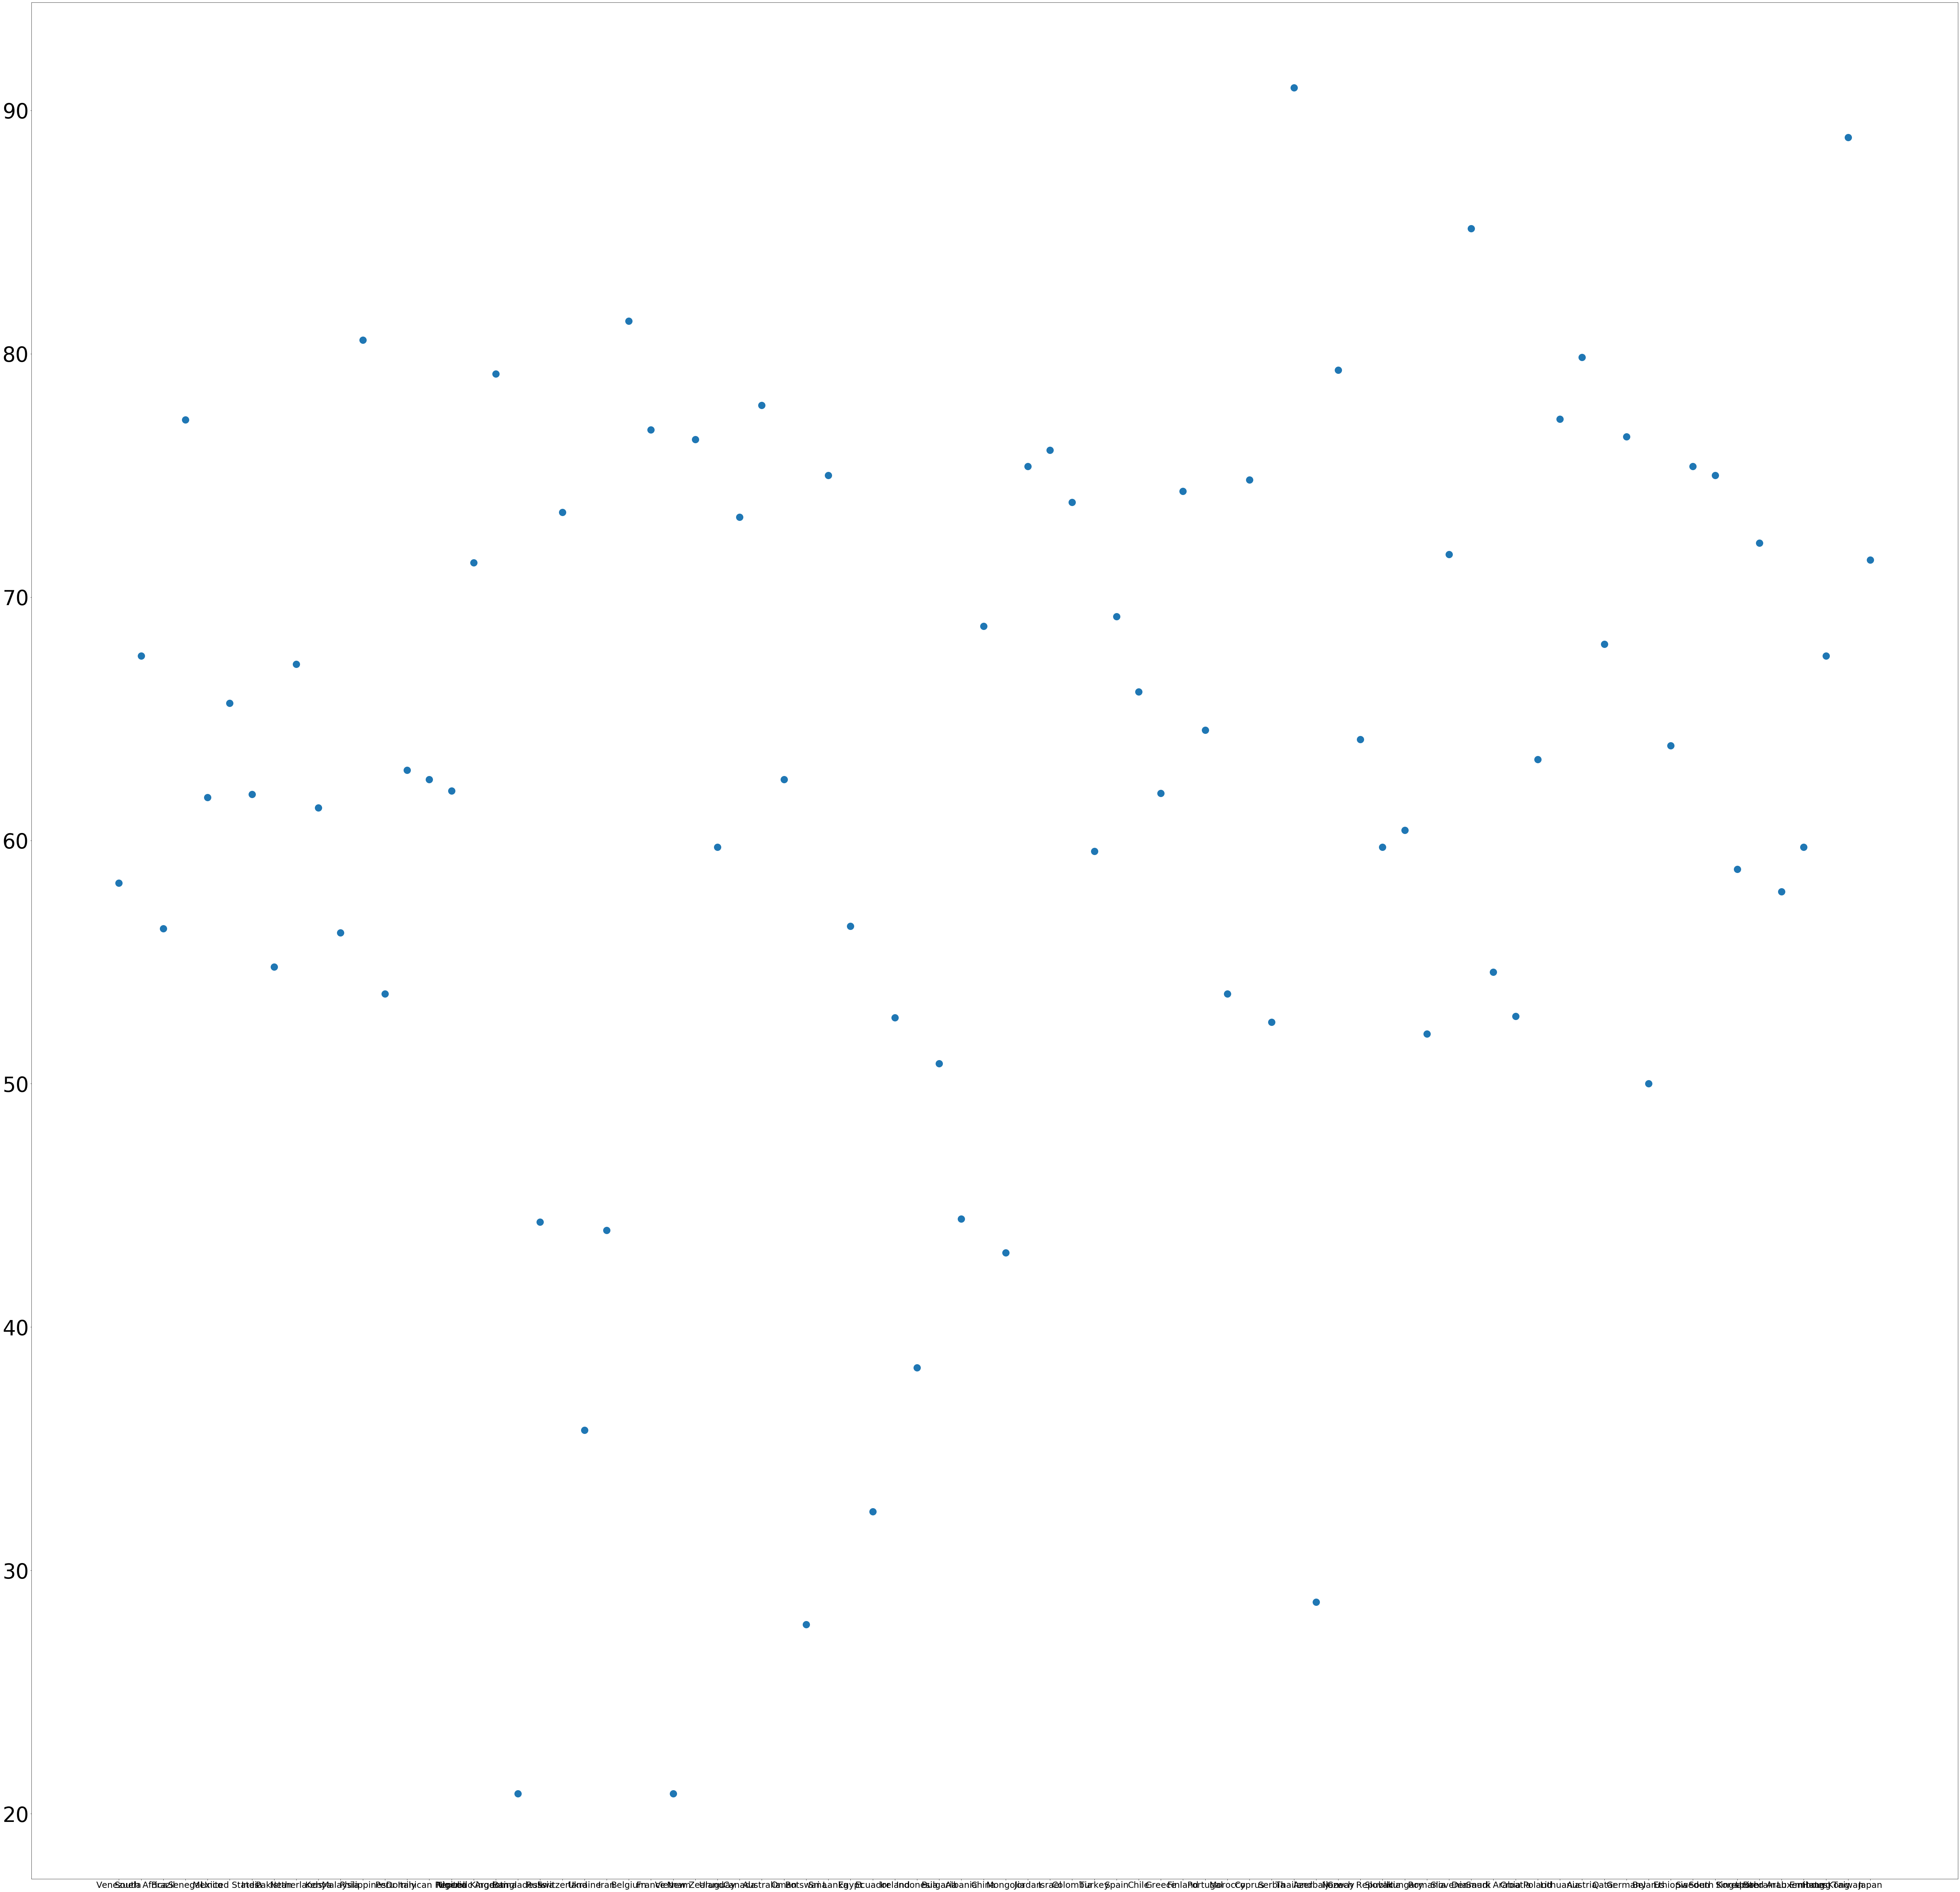

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(100,100))
plt.xticks(size = 25)
plt.yticks(size = 60)
plt.plot(list(country_pollution_rating.keys()), list(country_healthcare_rating.values()),'o', markersize=20)


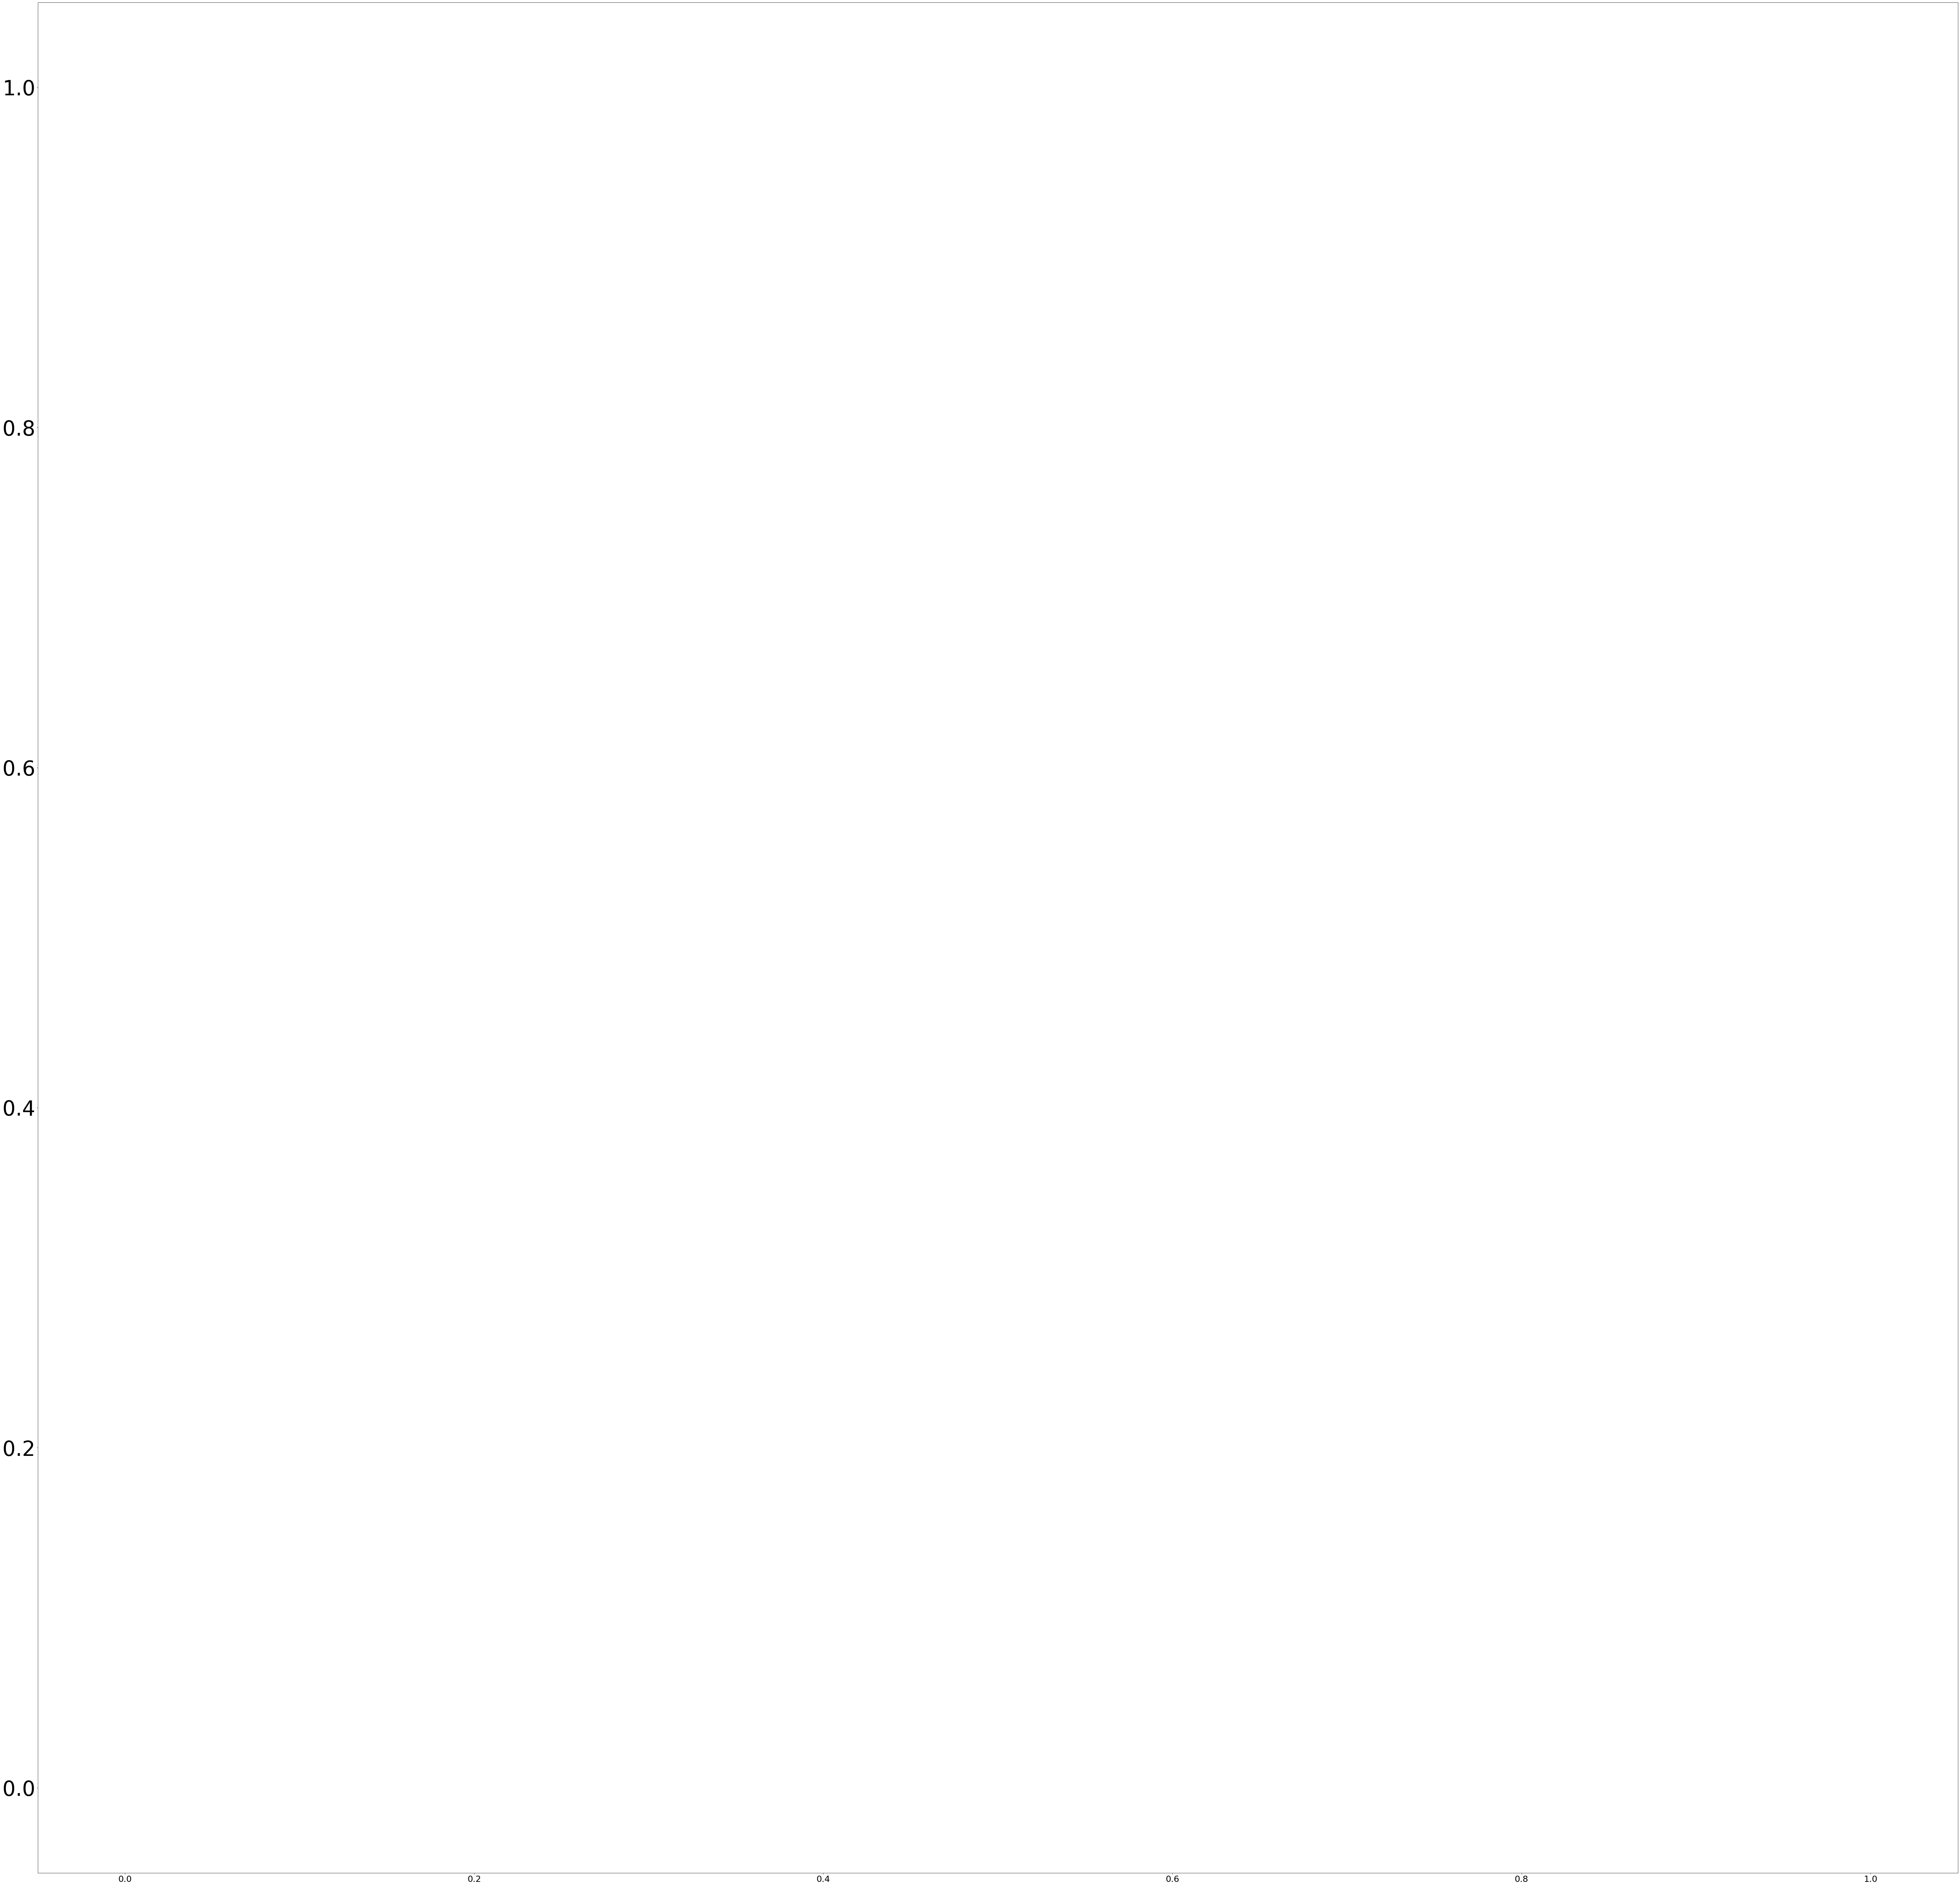

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(100,100))
plt.xticks(size = 25)
plt.yticks(size = 60)
plt.plot(list(country_healthcare_rating.keys()), list(country_healthcare_rating.values()),'black')


In [14]:
highest_covid = sorted(country_covid_cases.items(), key=lambda x: x[1], reverse=True)
highest_h1n1 = sorted(country_h1n1_cases.items(), key=lambda x: x[1], reverse=True)
lowest_healthcare = sorted(country_healthcare_rating.items(), key=lambda x: x[1])
highest_pollution = sorted(country_pollution_rating.items(), key=lambda x: x[1], reverse=True)

In [15]:
for i in country_covid_cases.keys():
    if i not in(country_healthcare_rating.keys()):
        country_healthcare_rating[i]=0
        
        
for i in (country_healthcare_rating.keys()):
    if i not in(country_covid_cases.keys()):
        country_covid_cases[i]=0

    
print(len(country_healthcare_rating.keys()))
print(len(country_covid_cases.keys()))

191
191


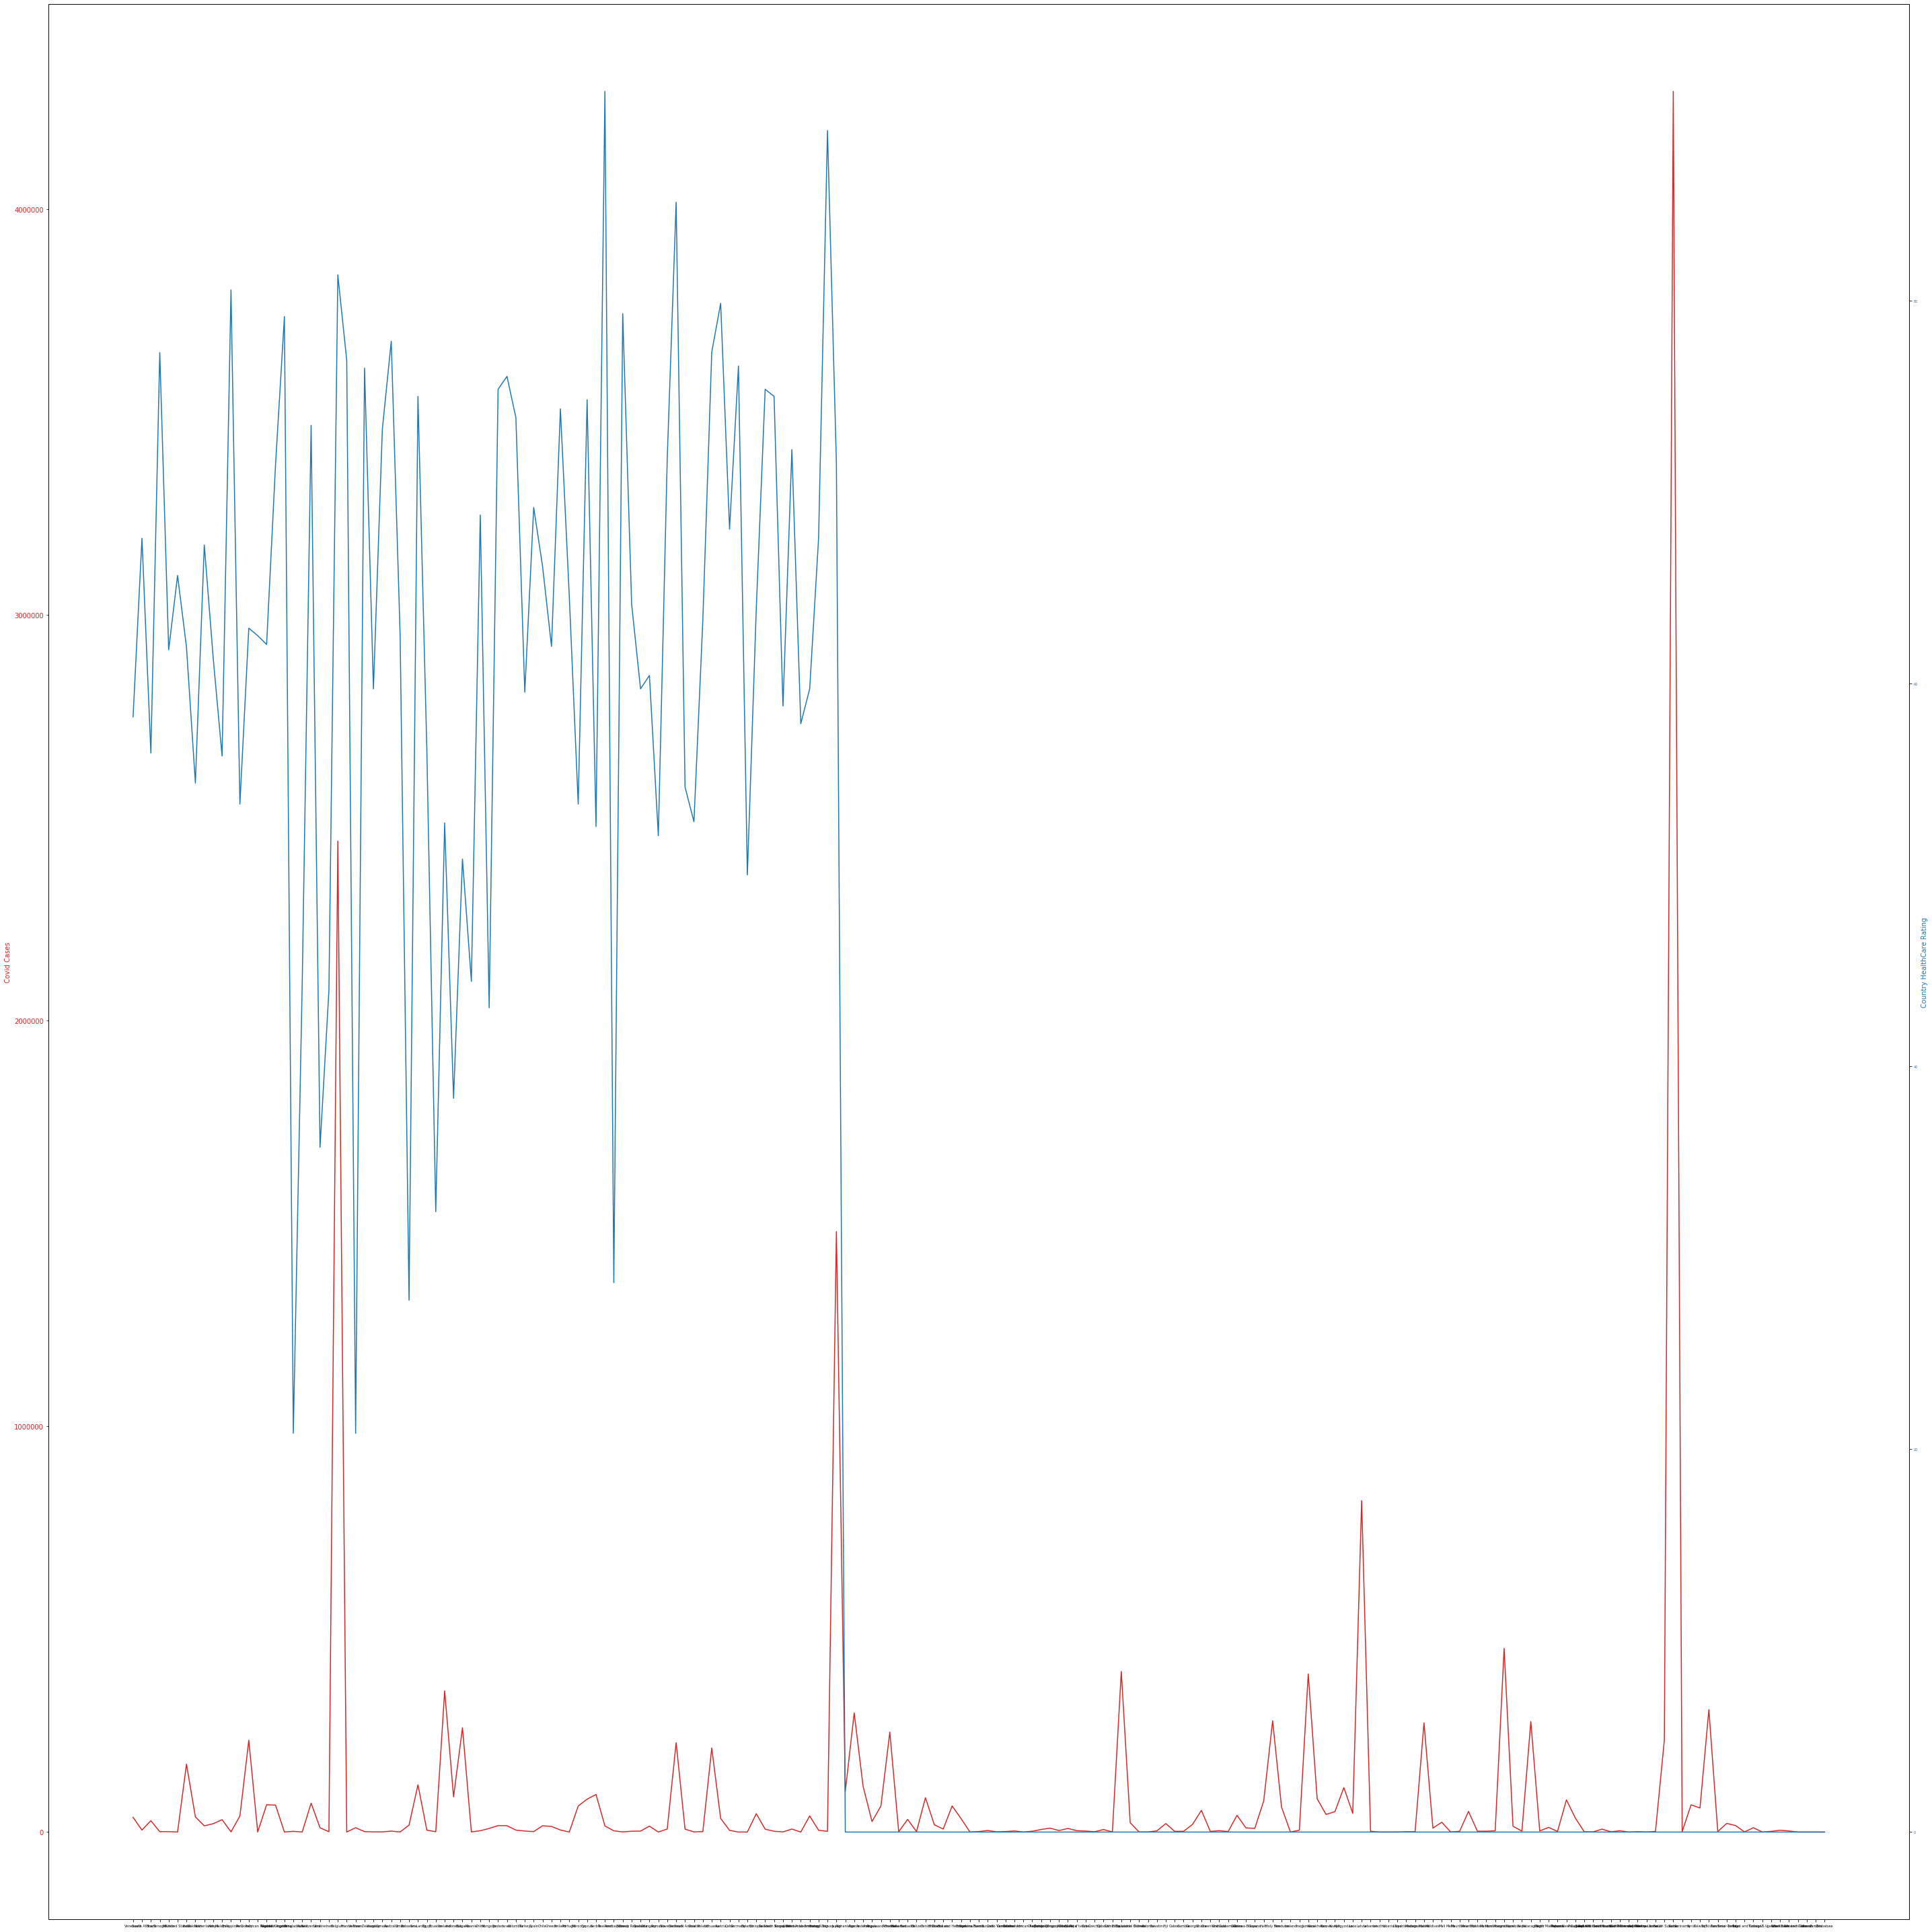

In [16]:
#plt.plot(np.array(list(country_covid_cases.values())), np.array(list(country_healthcare_rating.values())),'black')



import matplotlib.pyplot as plt
# plt.figure(figsize=(200,200))
# plt.xticks(size = 25)
# plt.yticks(size = 60)
# plt.plot(country_covid_cases.keys(), list(country_covid_cases.values()))
# plt.scatter(country_healthcare_rating.keys(),list(country_healthcare_rating.values()))
# plt.show()


fig, ax1 = plt.subplots(figsize=(40,40),)



color = 'tab:red'
ax1.set_ylabel('Covid Cases', color=color)
ax1.plot(list(country_covid_cases.keys()), list(country_covid_cases.values()), color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(size = 5)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Country HealthCare Rating', color=color)  # we already handled the x-label with ax1
ax2.plot(list(country_healthcare_rating.keys()), list(country_healthcare_rating.values()), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks(size = 5)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [17]:
# print("Countries with Highest Covid Cases")

index = 0;
for i in highest_covid:
    if index == 5:
        
        
        break
    print(i[0], i[1])
    index += 1

print("---------------------------------")

print("Countries with Highest Swine Flu Cases")

index = 0;
for i in highest_h1n1:
    if index == 5:
        break
    print(i[0], i[1])
    index += 1

print("---------------------------------")

print("Countries with Worst Health Care Quality")

index = 0;
for i in lowest_healthcare:
    if index == 5:
        break
    print(i[0], i[1])
    index += 1

print("---------------------------------")

print("Countries with Highest Pollution")

index = 0;
for i in highest_pollution:
    if index == 5:
        break
    print(i[0], i[1])
    index += 1

print("---------------------------------")

US 4290259
Brazil 2442375
India 1480073
Russia 816680
South Africa 452529
---------------------------------
Countries with Highest Swine Flu Cases
United States of America 33902
Mexico 10262
Canada 7983
United Kingdom 7447
Chile 7376
---------------------------------
Countries with Worst Health Care Quality
Bangladesh 20.83
Vietnam 20.83
Botswana 27.78
Azerbaijan 28.7
Ecuador 32.41
---------------------------------
Countries with Highest Pollution
Chile 92.42
Iran 87.62
Taiwan 87.62
Egypt 86.16
Poland 86.16
---------------------------------


As seen above, the United States tops both COVID and Swine Flu charts, even though not necessarily having bad healthcare quality or pollution. Nonetheless, the countries with the worst health care quality could definitely be investigated as potential hotspots, as they generally have high population density and lower standards of living, so some correlation may be warranted there. The pollution attribute seems contextually uncorrelated as first world countries such as Chile, Taiwan, and Poland rank high. Nonetheless, as seen with the United States, just because a country is a first world nation doesn't necessarily make a disease less likely to spread

In [68]:
def pairFeatures(x1,x2,label):
    pass
# 'Crime Rating'
print(city_2_country['Caracas'])
city_df.head()
# pairedFeatures = pairFeatures(city_df['Movehub Rating'],)
countries = []
for city in city_df['City']:
#     countries.appen
    if city in city_2_country.keys():
#         print("")
        pass
    else:
        print(city)
#     print(city_2_country[city])

Venezuela
Philadelphia
Rio De Janeiro
Sao Paulo
Miami
Lodz
Tampa
Cordoba
Washington
San Antonio
Cebu
Medellin
Pattaya
Istanbul
Phoenix
Galway
Minneapolis
San Diego
Portland
Malmo
San Francisco
Asheville
Rochester
Frankfurt
Izmir
Sliema
Davao
Zurich
Dusseldorf
Marbella
Malaga


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0  0  0 -1]


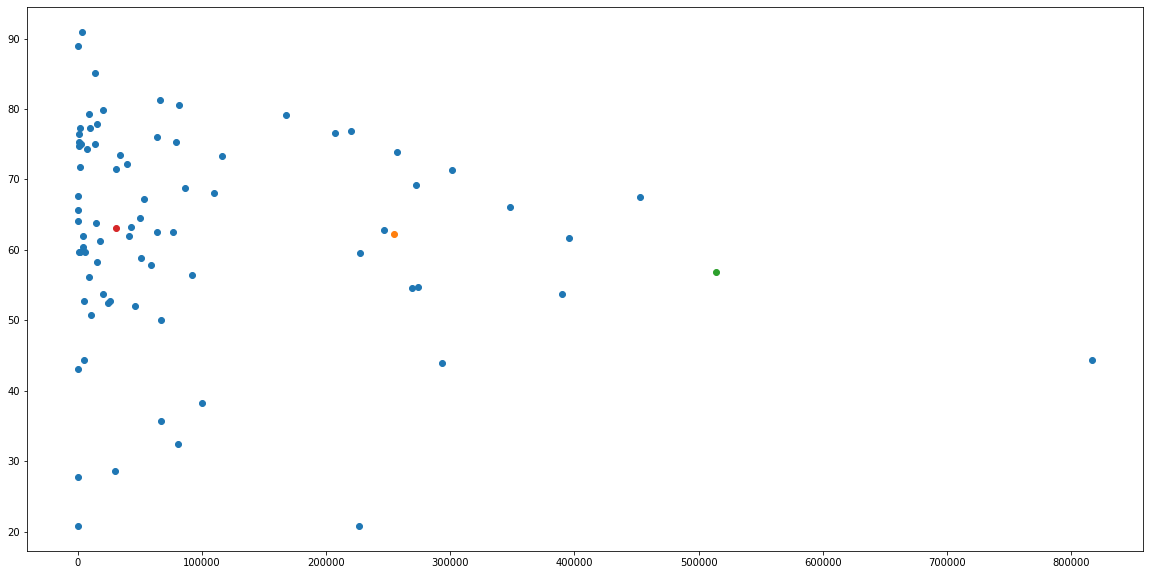

In [135]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

covidAndHealthcare = {}
for cN in country_covid_cases.keys():
    covidAndHealthcare[cN] = [country_covid_cases[cN],country_healthcare_rating[cN]]
    
outliers = []
for cN in covidAndHealthcare.keys():
    if covidAndHealthcare[cN][0] > 1000000:
        outliers.append(cN)
    elif covidAndHealthcare[cN][1] < 1:
        outliers.append(cN)
for cN in outliers:
    covidAndHealthcare.pop(cN)


X = np.array(list(covidAndHealthcare.values()))

clustering = DBSCAN(eps=2, min_samples=2).fit(X)
clusterLabels = clustering.labels_
print(clusterLabels)

kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_


fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(X[:,0],X[:,1])
for c in cluster_centers:
    ax.scatter(c[0],c[1],marker = 'o')

# plot = False
# if plot:
#     fig, ax = plt.subplots(figsize=(20,10))
#     for i in range(len(clusterLabels)):
#         if clusterLabels[i] == -1:
#             ax.scatter(X[i][0],X[i][1],color="black")
#         elif clusterLabels[i] == 0:
#             ax.scatter(X[i][0],X[i][1],color="red")
#         elif clusterLabels[i] == 1:
#             ax.scatter(X[i][0],X[i][1],color="green")
#         elif clusterLabels[i] == 2:
#             ax.scatter(X[i][0],X[i][1],color="yellow")
#         elif clusterLabels[i] == 3:
#             ax.scatter(X[i][0],X[i][1],color="orange")
#         elif clusterLabels[i] == 4:
#             ax.scatter(X[i][0],X[i][1],color="purple")
#         elif clusterLabels[i] == 5:
#             ax.scatter(X[i][0],X[i][1],color="gray")
#         elif clusterLabels[i] == 6:
#             ax.scatter(X[i][0],X[i][1],color="blue")

In [60]:
outliers = []
for cN in covidH1n1Pairs.keys():
    if covidH1n1Pairs[cN][0] > 500000:
        print(cN,covidH1n1Pairs[cN])
        outliers.append(cN)
    if covidH1n1Pairs[cN][1] > 3500:
        print(cN,covidH1n1Pairs[cN])
        outliers.append(cN)
for cN in outliers:
    covidH1n1Pairs.pop(cN)
    
labelNames = []
for cN in covidH1n1Pairs.keys():
    if covidH1n1Pairs[cN][0] > 150000:
        labelNames.append(cN)
    if covidH1n1Pairs[cN][1] > 500:
        labelNames.append(cN)    

Mexico [395489, 10262]
Canada [116458, 7983]
United Kingdom [301708, 7447]
Brazil [2442375, 737]
Australia [15303, 5298]
India [1480073, 129]
Chile [347923, 7376]
Russia [816680, 3]


Text(0, 0.5, 'H1N1 Cases')

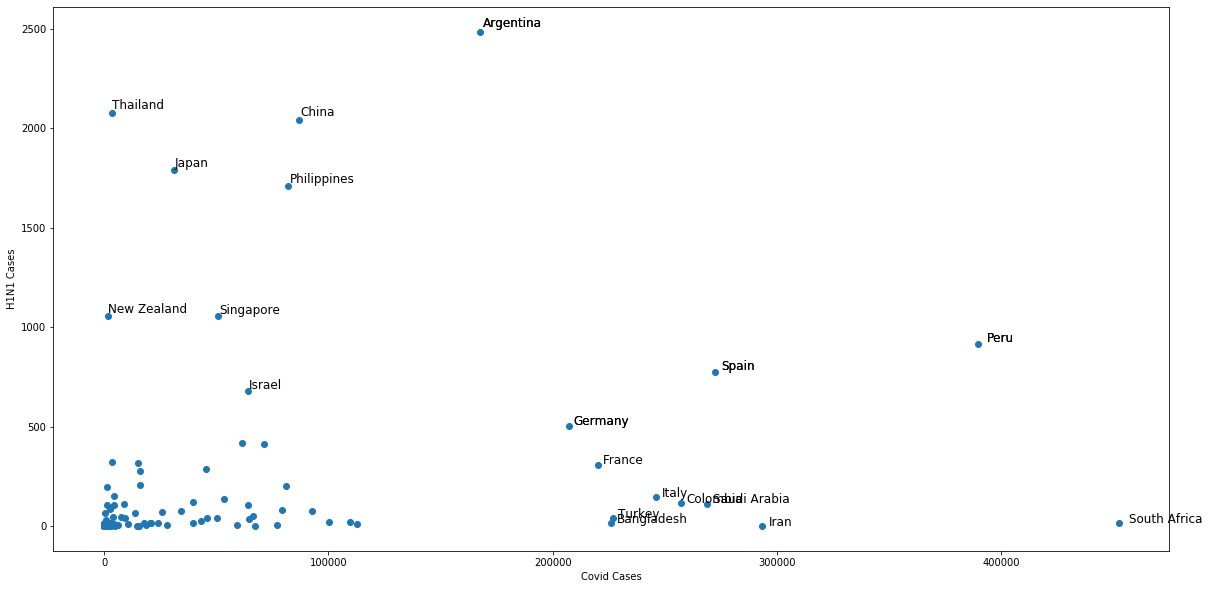

In [56]:
fig, ax = plt.subplots(figsize=(20,10))
x,y = [],[]
for xi,yi in covidH1n1Pairs.values():
    x.append(xi)
    y.append(yi)

ax.scatter(x,y)
for cN in labelNames:
    plt.text(covidH1n1Pairs[cN][0] * (1 + 0.01), covidH1n1Pairs[cN][1] * (1 + 0.01) , cN, fontsize=12)
ax.set_xlabel("Covid Cases")
ax.set_ylabel("H1N1 Cases")